# Redes Neuronales Convolucionales Profundas y Regularización

- Objetivo: Implementar redes convolucionales profundas, conocer el desempeño de los optimizadores y los efectos de regularización y profundidad en el entrenamiento. Se conocerá el resultado de BatchNormalization antes y después de la activación

- Se apilan dos a tres bloques convolucionales en redes VGG como muestra K. Simonyan y A. Zisserman en “Very Deep Convolutional Networks for Large-Scale Image Recognition” https://arxiv.org/abs/1409.1556


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras



fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                   'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


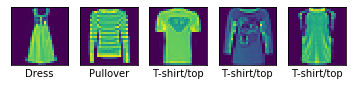

In [3]:
for i in range(5):
    rand_image_idx = np.random.randint(0, y_train.shape[0])
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_train[rand_image_idx])
    plt.xlabel(class_names[y_train[rand_image_idx]])
plt.show()

In [4]:
# escalar entre 0 y 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255


print(x_train.shape) # (60000, 28, 28, 1)
print(x_test.shape)  # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## Obtener dimensiones

In [5]:
x, y, channel = x_train.shape[1:]

input_shape = (x, y, channel)

In [6]:
epoch = 20
verbose = 1
batch = 50

## Deep CNN
- Red CNN profunda con 3 bloques de Conv2D y MaxPooling2D
- La activación es 'LeakyReLU'

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, LeakyReLU

In [8]:
def cnn():
    model = Sequential()
    
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None, input_shape = input_shape))
    model.add(LeakyReLU())
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(60, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(Conv2D(60, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
  
    model.add(Flatten())

    model.add(Dense(32, activation = None))
    model.add(LeakyReLU())
    model.add(Dense(32, activation = None))
    model.add(LeakyReLU())
    model.add(Dense(10, activation = 'softmax'))
    
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model 

In [9]:
model = cnn()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 20)        3620      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 40)        3240      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 40)        0

In [11]:
history1 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Epoch 1/20
840/840 [==============================] - 9s 11ms/step - loss: 0.5865 - accuracy: 0.7823 - val_loss: 0.4274 - val_accuracy: 0.8386
Epoch 2/20
840/840 [==============================] - 9s 11ms/step - loss: 0.3574 - accuracy: 0.8690 - val_loss: 0.3137 - val_accuracy: 0.8862
Epoch 3/20
840/840 [==============================] - 9s 11ms/step - loss: 0.2962 - accuracy: 0.8916 - val_loss: 0.2976 - val_accuracy: 0.8918
Epoch 4/20
840/840 [==============================] - 9s 11ms/step - loss: 0.2612 - accuracy: 0.9030 - val_loss: 0.2858 - val_accuracy: 0.8945
Epoch 5/20
840/840 [==============================] - 9s 11ms/step - loss: 0.2370 - accuracy: 0.9135 - val_loss: 0.2742 - val_accuracy: 0.8982
Epoch 6/20
840/840 [==============================] - 9s 11ms/step - loss: 0.2182 - accuracy: 0.9205 - val_loss: 0.2439 - val_accuracy: 0.9125
Epoch 7/20
840/840 [==============================] - 9s 10ms/step - loss: 0.2061 - accuracy: 0.9251 - val_loss: 0.2436 - val_accuracy: 0.9126

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

print('\nTest acccuracy:', test_acc)


Test acccuracy: 0.910099983215332



- Red CNN profunda con 2 bloques de Conv2D y MaxPooling2D

In [13]:
def cnn():
    model = Sequential()
    
   
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None, input_shape = input_shape))
    model.add(LeakyReLU())
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
  
    model.add(Flatten())

    model.add(Dense(32, activation = None))
    model.add(LeakyReLU())
    model.add(Dense(32, activation = None))
    model.add(LeakyReLU())
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model 


   

In [14]:
model = cnn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 20)        3620      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 40)        3240      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 40)       

In [15]:
history2 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Epoch 1/20
840/840 [==============================] - 8s 10ms/step - loss: 0.5116 - accuracy: 0.8125 - val_loss: 0.3620 - val_accuracy: 0.8701
Epoch 2/20
840/840 [==============================] - 8s 9ms/step - loss: 0.3214 - accuracy: 0.8846 - val_loss: 0.3208 - val_accuracy: 0.8845
Epoch 3/20
840/840 [==============================] - 8s 9ms/step - loss: 0.2715 - accuracy: 0.9021 - val_loss: 0.2949 - val_accuracy: 0.8914
Epoch 4/20
840/840 [==============================] - 8s 9ms/step - loss: 0.2390 - accuracy: 0.9136 - val_loss: 0.2647 - val_accuracy: 0.9077
Epoch 5/20
840/840 [==============================] - 8s 10ms/step - loss: 0.2141 - accuracy: 0.9220 - val_loss: 0.2716 - val_accuracy: 0.9051
Epoch 6/20
840/840 [==============================] - 8s 9ms/step - loss: 0.1934 - accuracy: 0.9282 - val_loss: 0.2586 - val_accuracy: 0.9073
Epoch 7/20
840/840 [==============================] - 8s 9ms/step - loss: 0.1739 - accuracy: 0.9357 - val_loss: 0.2402 - val_accuracy: 0.9162
Epoc

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

print('\nTest acccuracy:', test_acc)


Test acccuracy: 0.904699981212616


## Regularización

- Batch norm antes de activación con RMSprop 

In [17]:
from tensorflow.keras.layers import BatchNormalization

In [18]:
def cnn():
    model = Sequential()
      
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None, input_shape = input_shape))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
  
    model.add(Flatten())

    model.add(Dense(32, activation = None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Dense(32, activation = None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model 


   

In [19]:
model = cnn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 20)        80        
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 20)        3620      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 20)        80        
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 20)       

In [20]:
history3 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Epoch 1/20
840/840 [==============================] - 9s 11ms/step - loss: 0.4068 - accuracy: 0.8644 - val_loss: 0.3169 - val_accuracy: 0.8851
Epoch 2/20
840/840 [==============================] - 9s 11ms/step - loss: 0.2665 - accuracy: 0.9050 - val_loss: 0.2892 - val_accuracy: 0.8959
Epoch 3/20
840/840 [==============================] - 9s 11ms/step - loss: 0.2292 - accuracy: 0.9170 - val_loss: 0.2712 - val_accuracy: 0.9048
Epoch 4/20
840/840 [==============================] - 10s 11ms/step - loss: 0.2063 - accuracy: 0.9263 - val_loss: 0.2448 - val_accuracy: 0.9133
Epoch 5/20
840/840 [==============================] - 10s 11ms/step - loss: 0.1860 - accuracy: 0.9309 - val_loss: 0.2473 - val_accuracy: 0.9140
Epoch 6/20
840/840 [==============================] - 10s 11ms/step - loss: 0.1689 - accuracy: 0.9375 - val_loss: 0.2471 - val_accuracy: 0.9178
Epoch 7/20
840/840 [==============================] - 9s 11ms/step - loss: 0.1532 - accuracy: 0.9445 - val_loss: 0.2523 - val_accuracy: 0.9

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

print('\nTest acccuracy:', test_acc)


Test acccuracy: 0.9035999774932861


- Batch norm antes de activación con Adam

In [22]:
def cnn():
    model = Sequential()
    
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None, input_shape = input_shape))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(MaxPooling2D((2,2)))
    
  
    model.add(Flatten())

    model.add(Dense(32, activation = None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Dense(32, activation = None))
    model.add(BatchNormalization()) 
    model.add(LeakyReLU())
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model 


   

   

In [23]:
model = cnn()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 20)        80        
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 20)        3620      
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 20)        80        
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 20)       

In [24]:
history4 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Epoch 1/20
840/840 [==============================] - 9s 11ms/step - loss: 0.4374 - accuracy: 0.8589 - val_loss: 0.3240 - val_accuracy: 0.8841
Epoch 2/20
840/840 [==============================] - 9s 11ms/step - loss: 0.2656 - accuracy: 0.9046 - val_loss: 0.3166 - val_accuracy: 0.8865
Epoch 3/20
840/840 [==============================] - 9s 11ms/step - loss: 0.2246 - accuracy: 0.9193 - val_loss: 0.2567 - val_accuracy: 0.9082
Epoch 4/20
840/840 [==============================] - 9s 11ms/step - loss: 0.1979 - accuracy: 0.9280 - val_loss: 0.2492 - val_accuracy: 0.9112
Epoch 5/20
840/840 [==============================] - 9s 11ms/step - loss: 0.1812 - accuracy: 0.9352 - val_loss: 0.2810 - val_accuracy: 0.8962
Epoch 6/20
840/840 [==============================] - 9s 11ms/step - loss: 0.1651 - accuracy: 0.9390 - val_loss: 0.2451 - val_accuracy: 0.9136
Epoch 7/20
840/840 [==============================] - 9s 11ms/step - loss: 0.1470 - accuracy: 0.9457 - val_loss: 0.2557 - val_accuracy: 0.9117

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

print('\nTest acccuracy:', test_acc)


Test acccuracy: 0.9103999733924866


## Plots de entrenamiento

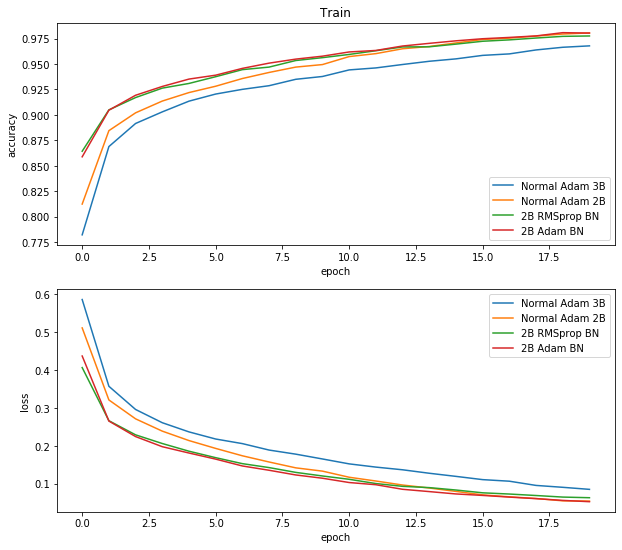

In [49]:
#plot
plt.figure(figsize=(10,9))
plt.subplot(211)
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history4.history['accuracy'])


plt.legend(['Normal Adam 3B',
            'Normal Adam 2B',
            '2B RMSprop BN',
            '2B Adam BN'])

plt.title('Train')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.subplot(212)
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.plot(history4.history['loss'])


plt.legend(['Normal Adam 3B',
            'Normal Adam 2B',
            '2B RMSprop BN',
            '2B Adam BN'])


plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()


## Plots de validación

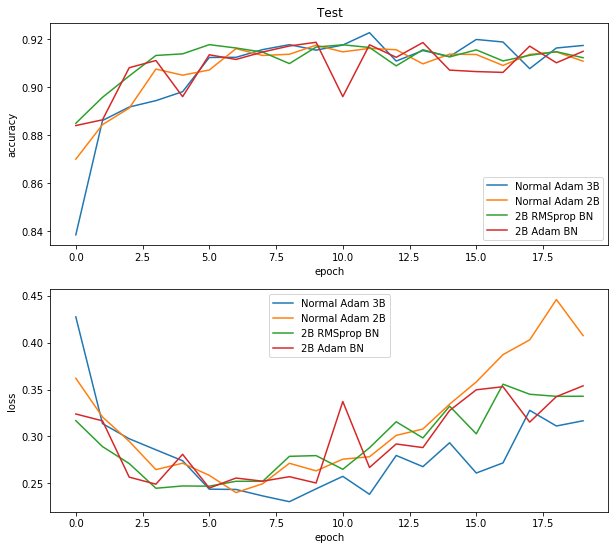

In [50]:
#plot
plt.figure(figsize=(10,9))
plt.subplot(211)
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])

plt.legend(['Normal Adam 3B',
            'Normal Adam 2B',
            '2B RMSprop BN',
            '2B Adam BN'])

plt.title('Test')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.subplot(212)
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['val_loss'])

plt.legend(['Normal Adam 3B',
            'Normal Adam 2B',
            '2B RMSprop BN',
            '2B Adam BN'])


plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()


- Usar EarlyStopping

## Batch Normalization después de activación

In [35]:
def cnn():
    model = Sequential()
    
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None, input_shape = input_shape))
    model.add(LeakyReLU())
    model.add(BatchNormalization()) 
    model.add(Conv2D(20, (3,3), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(BatchNormalization()) 
    model.add(Conv2D(40, (2,2), padding = 'same', activation=None))
    model.add(LeakyReLU())
    model.add(BatchNormalization()) 
    model.add(MaxPooling2D((2,2)))
    
  
    model.add(Flatten())

    model.add(Dense(32, activation = None))
    model.add(LeakyReLU())
    model.add(BatchNormalization()) 
    model.add(Dense(32, activation = None))
    model.add(LeakyReLU())
    model.add(BatchNormalization()) 
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model 


   

   

In [36]:
model = cnn()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 20)        200       
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 20)        80        
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 20)        3620      
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 28, 28, 20)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 28, 20)        80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 20)       

In [37]:
history5 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3, 
                    epochs = epoch, verbose = verbose)

Epoch 1/20
840/840 [==============================] - 10s 12ms/step - loss: 0.4002 - accuracy: 0.8617 - val_loss: 0.3249 - val_accuracy: 0.8887
Epoch 2/20
840/840 [==============================] - 9s 11ms/step - loss: 0.2685 - accuracy: 0.9045 - val_loss: 0.2773 - val_accuracy: 0.9058
Epoch 3/20
840/840 [==============================] - 9s 11ms/step - loss: 0.2270 - accuracy: 0.9177 - val_loss: 0.2727 - val_accuracy: 0.9043
Epoch 4/20
840/840 [==============================] - 9s 11ms/step - loss: 0.2024 - accuracy: 0.9275 - val_loss: 0.2693 - val_accuracy: 0.9038
Epoch 5/20
840/840 [==============================] - 9s 11ms/step - loss: 0.1834 - accuracy: 0.9336 - val_loss: 0.2481 - val_accuracy: 0.9142
Epoch 6/20
840/840 [==============================] - 10s 12ms/step - loss: 0.1640 - accuracy: 0.9400 - val_loss: 0.2660 - val_accuracy: 0.9104
Epoch 7/20
840/840 [==============================] - 9s 11ms/step - loss: 0.1511 - accuracy: 0.9464 - val_loss: 0.2701 - val_accuracy: 0.91

In [38]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)

print('\nTest acccuracy:', test_acc)


Test acccuracy: 0.9043999910354614


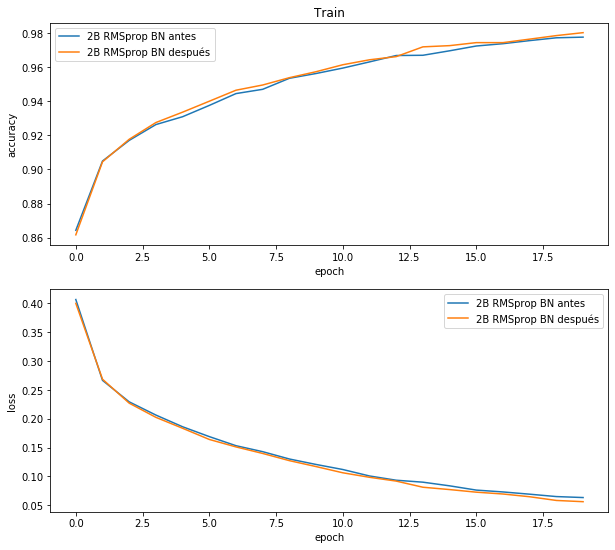

In [51]:
#plot
plt.figure(figsize=(10,9))
plt.subplot(211)

plt.plot(history3.history['accuracy'])
plt.plot(history5.history['accuracy'])


plt.legend(['2B RMSprop BN antes',
            '2B RMSprop BN después'])

plt.title('Train')
plt.ylabel('accuracy')
plt.xlabel('epoch')


plt.subplot(212)
plt.plot(history3.history['loss'])
plt.plot(history5.history['loss'])


plt.legend(['2B RMSprop BN antes',
            '2B RMSprop BN después'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


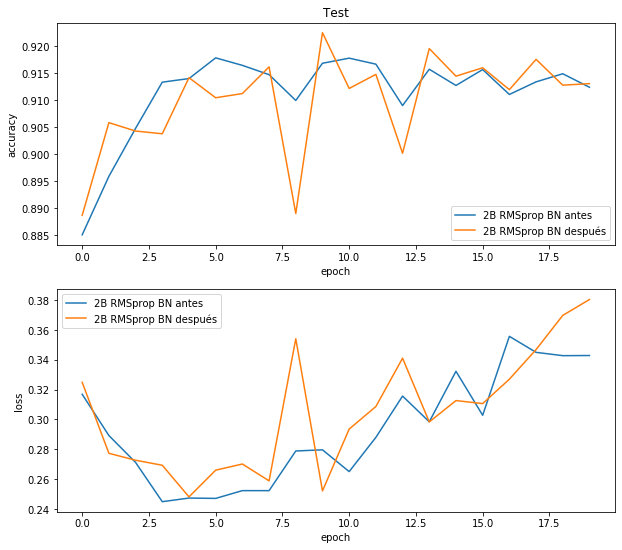

In [58]:
#plot
plt.figure(figsize=(10,9))
plt.subplot(211)

plt.plot(history3.history['val_accuracy'])
plt.plot(history5.history['val_accuracy'])


plt.legend(['2B RMSprop BN antes',
            '2B RMSprop BN después'])

plt.title('Test')
plt.ylabel('accuracy')
plt.xlabel('epoch')


plt.subplot(212)
plt.plot(history3.history['val_loss'])
plt.plot(history5.history['val_loss'])


plt.legend(['2B RMSprop BN antes',
            '2B RMSprop BN después'])

plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


- Modificar la arquitectura para entrenar en menos tiempo y obtener mejor test accuracy.
- Agregar otros métodos de regularización
- Experimentar con otro dataset
- Experimentar con el número de filtros, pooling, strides y kernel_size